## Charity Smith
## MSDS 670 
## Week 5 Assignment: Data Visualizations with Matplotlib

In [212]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [213]:
# Load the dataset
file = "Dry_Eye_Dataset.csv"
df = pd.read_csv(file)

In [214]:
# View summary statistics and info on the dataset
print("Dataset Overview:\n")
print(df.info()) 
print("\nDescriptive Statistics:\n")
print(df.describe())

Dataset Overview:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       20000 non-null  object 
 1   Age                          20000 non-null  int64  
 2   Sleep duration               20000 non-null  float64
 3   Sleep quality                20000 non-null  int64  
 4   Stress level                 20000 non-null  int64  
 5   Blood pressure               20000 non-null  object 
 6   Heart rate                   20000 non-null  int64  
 7   Daily steps                  20000 non-null  int64  
 8   Physical activity            20000 non-null  int64  
 9   Height                       20000 non-null  int64  
 10  Weight                       20000 non-null  int64  
 11  Sleep disorder               20000 non-null  object 
 12  Wake up during night         20000 non-null  object 
 1

In [215]:
# Check for missing values in each column
print("Missing Values Count:\n")
print(df.isnull().sum())

Missing Values Count:

Gender                         0
Age                            0
Sleep duration                 0
Sleep quality                  0
Stress level                   0
Blood pressure                 0
Heart rate                     0
Daily steps                    0
Physical activity              0
Height                         0
Weight                         0
Sleep disorder                 0
Wake up during night           0
Feel sleepy during day         0
Caffeine consumption           0
Alcohol consumption            0
Smoking                        0
Medical issue                  0
Ongoing medication             0
Smart device before bed        0
Average screen time            0
Blue-light filter              0
Discomfort Eye-strain          0
Redness in eye                 0
Itchiness/Irritation in eye    0
Dry Eye Disease                0
dtype: int64


In [216]:
df.columns = df.columns.str.strip()
print(df.columns)

Index(['Gender', 'Age', 'Sleep duration', 'Sleep quality', 'Stress level',
       'Blood pressure', 'Heart rate', 'Daily steps', 'Physical activity',
       'Height', 'Weight', 'Sleep disorder', 'Wake up during night',
       'Feel sleepy during day', 'Caffeine consumption', 'Alcohol consumption',
       'Smoking', 'Medical issue', 'Ongoing medication',
       'Smart device before bed', 'Average screen time', 'Blue-light filter',
       'Discomfort Eye-strain', 'Redness in eye',
       'Itchiness/Irritation in eye', 'Dry Eye Disease'],
      dtype='object')


In [217]:
# Rename columns to simpler, shorter versions
column_rename_map = {
    'Gender': 'gender',
    'Age': 'age',
    'Sleep duration': 'sleep_hours',
    'Sleep quality': 'sleep_quality',
    'Stress level': 'stress',
    'Blood pressure': 'bp',
    'Heart rate': 'heart_rate',
    'Daily steps': 'steps',
    'Physical activity': 'activity',
    'Height': 'height',
    'Weight': 'weight',
    'Sleep disorder': 'sleep_disorder',
    'Wake up during night': 'wake_night',
    'Feel sleepy during day': 'day_sleepiness',
    'Caffeine consumption': 'caffeine',
    'Alcohol consumption': 'alcohol',
    'Smoking': 'smoking',
    'Medical issue': 'medical_issue',
    'Ongoing medication': 'medication',
    'Smart device before bed': 'device_before_bed',
    'Average screen time': 'screen_time',
    'Blue-light filter': 'blue_light_filter',
    'Discomfort Eye-strain': 'eye_strain',
    'Redness in eye': 'eye_redness',
    'Itchiness/Irritation in eye': 'eye_itchiness',
    'Dry Eye Disease': 'dry_eye'
}

df.rename(columns=column_rename_map, inplace=True)

In [218]:
print(df.head())  # Shows the first few rows with updated column names
print("\nUpdated Columns:\n", df.columns)  # Displays all column names

  gender  age  sleep_hours  sleep_quality  stress      bp  heart_rate  steps  \
0      F   24          9.5              2       1  137/89          67   3000   
1      M   39          9.6              2       3  108/64          60  12000   
2      F   45          5.4              1       5  134/81          95  12000   
3      F   45          5.4              4       5  110/90          78  19000   
4      F   42          5.7              3       2   99/67          72   4000   

   activity  height  ...  smoking medical_issue medication device_before_bed  \
0        31     161  ...        N             Y          Y                 N   
1        74     164  ...        N             Y          Y                 N   
2        93     179  ...        N             N          N                 Y   
3        32     160  ...        N             Y          N                 N   
4       173     179  ...        N             Y          N                 N   

  screen_time blue_light_filter eye_st

In [219]:
# Convert categorical values (Y/N) into binary (1/0)
# Remove extra spaces and ensure all values are uppercase
for col in binary_columns:
    df[col] = df[col].astype(str).str.strip().str.upper()

# Map Y/N to 1/0, replacing anything unexpected with NaN first
for col in binary_columns:
    df[col] = df[col].map({'Y': 1, 'N': 0})

# Fill NaN values with 0 (assuming missing values mean 'No')
df[binary_columns] = df[binary_columns].fillna(0)

# Verify conversion worked
print(df[binary_columns].head(10))

   smoking  medical_issue  medication  device_before_bed  blue_light_filter  \
0        0              1           1                  0                  0   
1        0              1           1                  0                  1   
2        0              0           0                  1                  0   
3        0              1           0                  0                  0   
4        0              1           0                  0                  0   
5        1              1           1                  1                  1   
6        0              1           1                  1                  1   
7        0              0           1                  0                  1   
8        1              1           0                  0                  1   
9        0              1           1                  0                  0   

   eye_strain  eye_redness  eye_itchiness  dry_eye  
0           1            1              0        1  
1           0           

In [220]:
df.head()

,gender,age,sleep_hours,sleep_quality,stress,bp,heart_rate,steps,activity,height,...,smoking,medical_issue,medication,device_before_bed,screen_time,blue_light_filter,eye_strain,eye_redness,eye_itchiness,dry_eye
0,F,24,9.5,2,1,137/89,67,3000,31,161,...,0,1,1,0,8.7,0,1,1,0,1
1,M,39,9.6,2,3,108/64,60,12000,74,164,...,0,1,1,0,9.6,1,0,0,1,1
2,F,45,5.4,1,5,134/81,95,12000,93,179,...,0,0,0,1,4.0,0,1,0,0,0
3,F,45,5.4,4,5,110/90,78,19000,32,160,...,0,1,0,0,7.6,0,1,0,1,0
4,F,42,5.7,3,2,99/67,72,4000,173,179,...,0,1,0,0,3.5,0,1,1,0,1


In [221]:
df['dry_eye'].value_counts()

dry_eye
1    13037
0     6963
Name: count, dtype: int64

In [222]:
# Convert screen time to numeric 
df['screen_time'] = pd.to_numeric(df['screen_time'], errors='coerce') 

### Plot 1: Histogram: Distribution of Sleep Duration

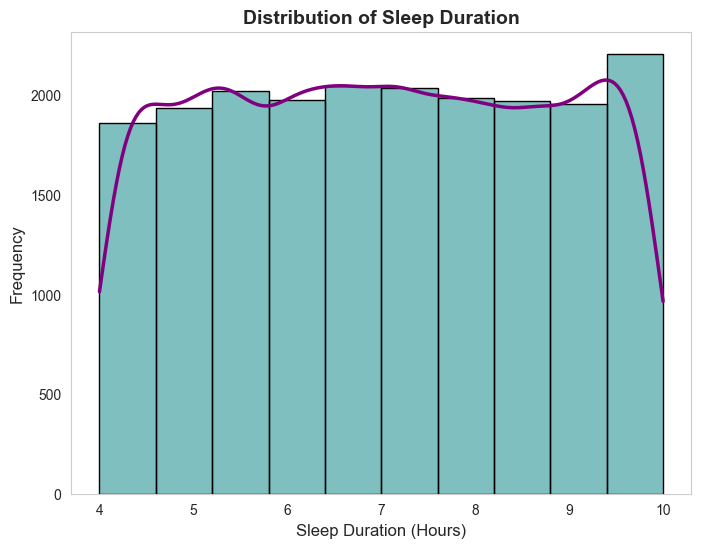

In [223]:
# Plot the data

# Set figure size
plt.figure(figsize=(8,6))

# Create histogram with improved aesthetics
sns.histplot(df['sleep_hours'], bins=10, kde=True, color='teal', edgecolor='black')

# Improve KDE line visibility
plt.gca().lines[0].set_linewidth(2.5)  # Thicker line
plt.gca().lines[0].set_color('purple')  # Purple for better contrast

# Remove unnecessary gridlines
plt.grid(False)

# Improve readability of title and labels
plt.title("Distribution of Sleep Duration", fontsize=14, fontweight='bold')
plt.xlabel("Sleep Duration (Hours)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

# Show the plot
plt.show()


### Plot 2: Stacked Bar Chart: Effect of Blue-Light Filters on Eye Symptoms

In [224]:
# Group data by blue-light filter usage and calculate prevalence of symptoms
eye_symptoms = df.groupby('blue_light_filter')[['eye_strain', 'eye_redness', 'eye_itchiness']].mean() * 100

<Figure size 800x600 with 0 Axes>

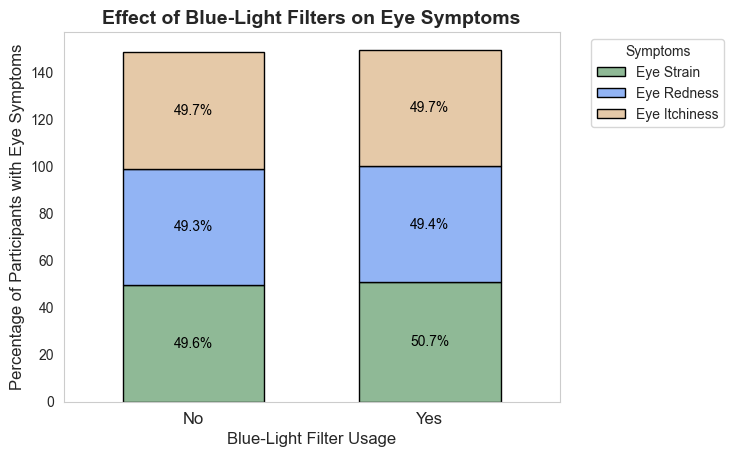

In [228]:
# Plot the data
# Rename columns for readability
eye_symptoms.columns = ['Eye Strain', 'Eye Redness', 'Eye Itchiness']

# Set up figure
plt.figure(figsize=(8, 6))

# Define colors
colors = ['#8FB996', '#92B4F4', '#E5C9A8'] 

# Create stacked bar chart
ax = eye_symptoms.plot(kind='bar', stacked=True, width=0.6, edgecolor='black', color=colors)

# Move legend outside the chart
plt.legend(title="Symptoms", fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')

# Change x-axis labels from 0/1 to "No" and "Yes" and the orientation
plt.xticks(ticks=[0, 1], labels=["No", "Yes"], fontsize=12)
plt.xticks(rotation=0)  # Set x-axis labels horizontal

# Improve labels
plt.title("Effect of Blue-Light Filters on Eye Symptoms", fontsize=14, weight='bold')
plt.xlabel("Blue-Light Filter Usage", fontsize=12)
plt.ylabel("Percentage of Participants with Eye Symptoms", fontsize=12)

# Remove gridlines
plt.grid(False)

# Add percentage labels
for container, color in zip(ax.containers, colors):
    text_color = 'black'
    ax.bar_label(container, fmt='%.1f%%', label_type='center', fontsize=10, color=text_color)

# Show plot
plt.show()

### Plot 3: Bar Chart - Average Sleep by Step Groups

In [229]:
# Bin Daily Steps into categories
df['step_group'] = pd.cut(df['steps'], bins=[0, 5000, 10000, 15000, 20000], 
                          labels=['0-5k', '5k-10k', '10k-15k', '15k-20k'])

# Display the count of data points in each bin
print(df['step_group'].value_counts())

step_group
5k-10k     5102
15k-20k    5063
10k-15k    4952
0-5k       4883
Name: count, dtype: int64


In [230]:
# Calculate average sleep duration per step group
avg_sleep = df.groupby('step_group')['sleep_hours'].mean().reset_index()
print(avg_sleep)

  step_group  sleep_hours
0       0-5k     7.003584
1     5k-10k     6.978361
2    10k-15k     6.990327
3    15k-20k     7.020877


/var/folders/nc/ynm8w4053qg59qhr2zcdcpyh0000gn/T/ipykernel_42005/4148470543.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_sleep = df.groupby('step_group')['sleep_hours'].mean().reset_index()


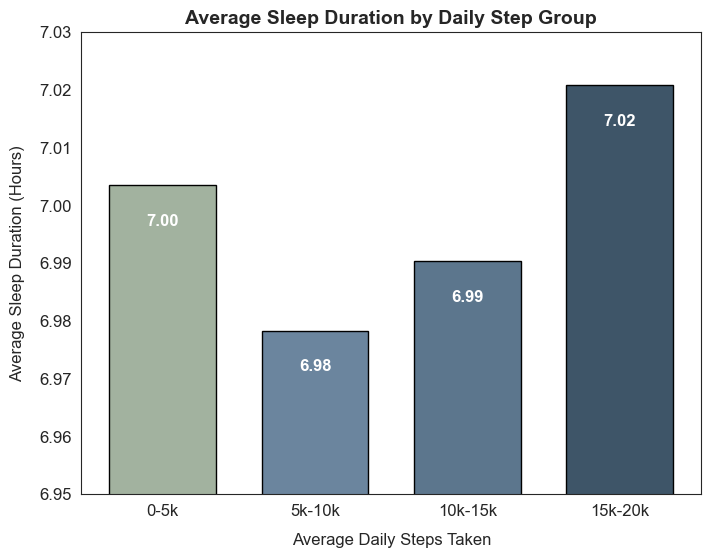

In [231]:
# Plot the data
# Set up the figure and style
plt.figure(figsize=(8, 6))
sns.set_style("white")  # Remove gridlines for a cleaner look

# Define colors for better balance
colors = ["#A2B29F", "#6B859E", "#5C768D", "#3E5568"]  # Four visually balanced colors

# Create bar chart
bars = plt.bar(avg_sleep['step_group'], avg_sleep['sleep_hours'], 
               color=colors, edgecolor='black', width=0.7)  # Adjust width for better spacing

# Add labels inside bars, slightly below the top
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height - 0.005, f'{height:.2f}', 
             ha='center', va='top', fontsize=12, fontweight='bold', color='white')

# Titles and labels
plt.title("Average Sleep Duration by Daily Step Group", fontsize=14, weight='bold')
plt.xlabel("Average Daily Steps Taken", fontsize=12, labelpad=10)
plt.ylabel("Average Sleep Duration (Hours)", fontsize=12, labelpad=10)

# Improve tick label formatting
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adjust y-axis limits for better readability (slightly reduced height)
plt.ylim(6.95, 7.03)

# Show the plot
plt.show()

### Plot 4: Horizontal Bar Chart: Frequency of Eye Symptoms by Gender

In [232]:
# Define the symptom categories
symptoms = ["eye_strain", "eye_redness", "eye_itchiness"]

# Group by gender and each symptom, then count occurrences
df_grouped = df.groupby("gender")[symptoms].sum()

# Convert to percentage (normalize by column total)
df_grouped = df_grouped.div(df_grouped.sum(axis=0), axis=1) * 100

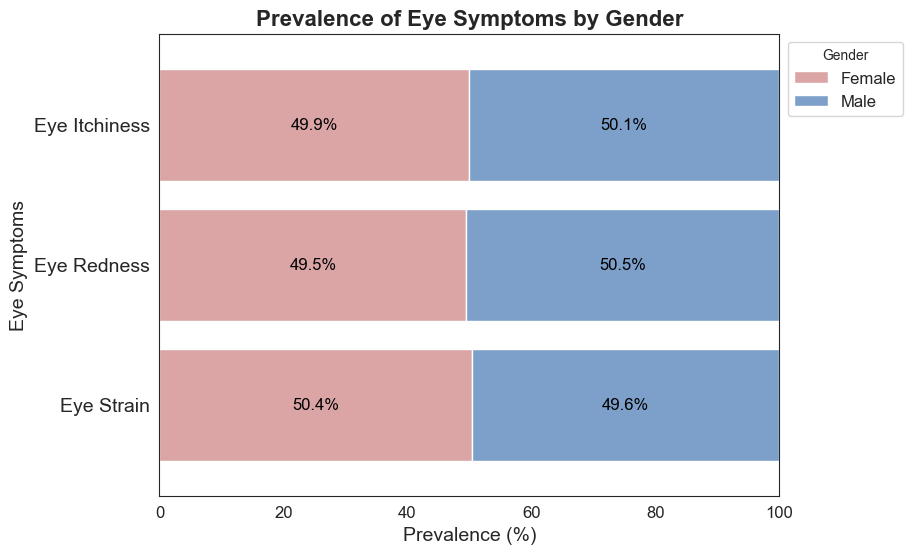

In [233]:
# Plot data
# Define new color scheme
colors = ["#DBA5A5", "#7DA0CA"]

# Create figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Adjust bar width for better spacing
df_grouped.T.plot(kind="barh", stacked=True, color=colors, ax=ax, width=0.8)

# Rename y-axis labels for readability
symptom_labels = {
    "eye_strain": "Eye Strain",
    "eye_redness": "Eye Redness",
    "eye_itchiness": "Eye Itchiness"
}

ax.set_yticklabels([symptom_labels[label] for label in df_grouped.T.index], fontsize=14) 
ax.set_yticklabels([symptom_labels[label] for label in symptoms]) 

# Titles and labels
plt.title("Prevalence of Eye Symptoms by Gender", fontsize=16, weight='bold')
plt.xlabel("Prevalence (%)", fontsize=14)  
plt.ylabel("Eye Symptoms", fontsize=14) 

# Adjust x-axis limits to remove unnecessary white space
plt.xlim(0, 100)  


# Add labels inside bars
for bars in ax.containers:
    ax.bar_label(bars, fmt="%.1f%%", label_type="center", fontsize=12, color="black")


# Move the legend outside the plot (to the right)
plt.legend(["Female", "Male"], title="Gender", fontsize=12, loc="upper left", bbox_to_anchor=(1, 1))

# Improve tick label readability
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)

# Remove unnecessary gridlines
ax.grid(False)

# Show plot
plt.show()

### Plot 5: Habits and Percentages of Dry Eye Disease

In [272]:
print(df.columns)

Index(['gender', 'age', 'sleep_hours', 'sleep_quality', 'stress', 'bp',
       'heart_rate', 'steps', 'activity', 'height', 'weight', 'sleep_disorder',
       'wake_night', 'day_sleepiness', 'caffeine', 'alcohol', 'smoking',
       'medical_issue', 'medication', 'device_before_bed', 'screen_time',
       'blue_light_filter', 'eye_strain', 'eye_redness', 'eye_itchiness',
       'dry_eye', 'step_group', 'age_group'],
      dtype='object')


In [275]:
mapping = {"Yes": 1, "No": 0, "Y": 1, "N": 0}
df.replace(mapping, inplace=True)

/var/folders/nc/ynm8w4053qg59qhr2zcdcpyh0000gn/T/ipykernel_42005/734700813.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(mapping, inplace=True)


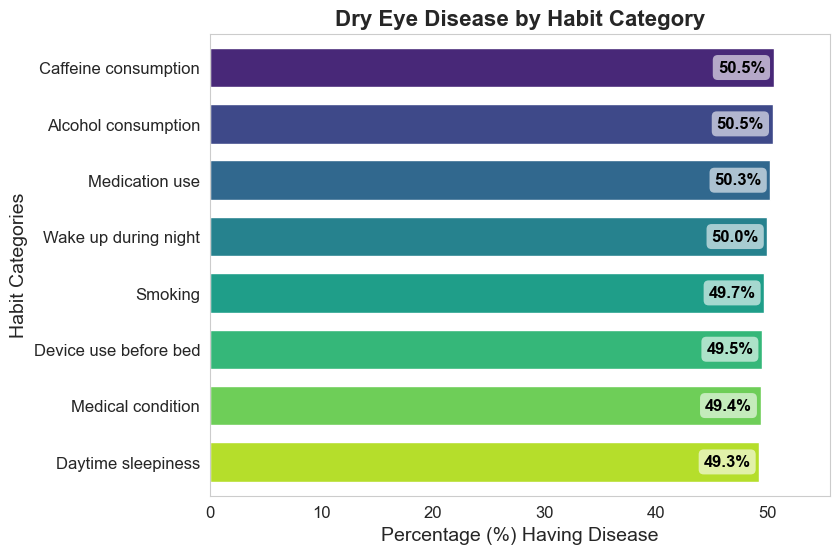

In [330]:
# Plot data
# Set seaborn style
sns.set_style("whitegrid")

# Define habit categories
habit_categories = {
    "wake_night": "Wake up during night",
    "day_sleepiness": "Daytime sleepiness",
    "caffeine": "Caffeine consumption",
    "alcohol": "Alcohol consumption",
    "smoking": "Smoking",
    "medical_issue": "Medical condition",
    "medication": "Medication use",
    "device_before_bed": "Device use before bed"
}

# Ensure habits are numeric (0/1)
df[list(habit_categories.keys())] = df[list(habit_categories.keys())].apply(pd.to_numeric, errors="coerce")

# Calculate percentage of Dry Eye Disease (dry_eye == 1) for each habit
dry_eye_percent = df[df["dry_eye"] == 1][list(habit_categories.keys())].mean() * 100  

# Rename labels for readability
dry_eye_percent.index = dry_eye_percent.index.map(habit_categories)

# Sort in descending order (most significant factors on top)
dry_eye_percent = dry_eye_percent.sort_values(ascending=True)

# Define new color scheme (teal-blue-green)
color_palette = sns.color_palette("viridis_r", len(dry_eye_percent))

# Create horizontal bar chart with better spacing
fig, ax = plt.subplots(figsize=(8, 6))
dry_eye_percent.plot(kind="barh", color=color_palette, ax=ax, width=0.7) 

# Labels and title
plt.title("Dry Eye Disease by Habit Category", fontsize=16, weight="bold")
plt.xlabel("Percentage (%) Having Disease", fontsize=14)
plt.ylabel("Habit Categories", fontsize=14)

# Semi-Transparent Text Box (Best Readability)
for index, value in enumerate(dry_eye_percent):
    ax.text(value - 5, index, f"{value:.1f}%", 
            va="center", fontsize=12, color="black", weight="bold",
            bbox=dict(facecolor="white", alpha=0.6, edgecolor="none", boxstyle="round,pad=0.3"))  # White background
    
# Adjust x-axis limit to reduce excess white space
plt.xlim(0, dry_eye_percent.max() * 1.1)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Remove gridlines
plt.grid(False)

# Show plot
plt.show()

### References
https://www.kaggle.com/datasets/arifmia/sleep-health-and-digital-screen-exposure-dataset/data